Dissertation
    
# **Notebook 3A: Ranking LSOAs and Analysis**
    
This notebook will use PCA to create score for each LSOA, then calculate change. This will be utilised to idenify ascending or descending LSOAs.
Code adapted from https://github.com/jytg17/Unpacking-the-Nuances-of-Londons-Neighbourhood-Change-Gentrification-Trajectories-codes
***

In [175]:
# Load packages

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx


# PCA

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection
import numpy as np

In [176]:
# Look at working dir

print("The working directory is " + os.getcwd())

The working directory is /home/jovyan/work/OneDrive/UCL/Dissertation/Notebooks V3


In [177]:
shapefiles = os.path.join("Shapefiles")

profiles = os.path.join("LSOA Profiles")

clean = os.path.join("Cleaned data")

# 1. Import in data

In [178]:
# Import data

variables = pd.read_csv(os.path.join(clean, "ranking_vars.csv"))

In [179]:
# Split

vars_2001 = variables.filter(regex="_2001")
vars_2011 =  variables.filter(regex="_2011")

In [180]:
# Kent outline

outline = gpd.read_file(os.path.join(shapefiles, "KENT_OUTLINE.shp"))

# 3. Visualise

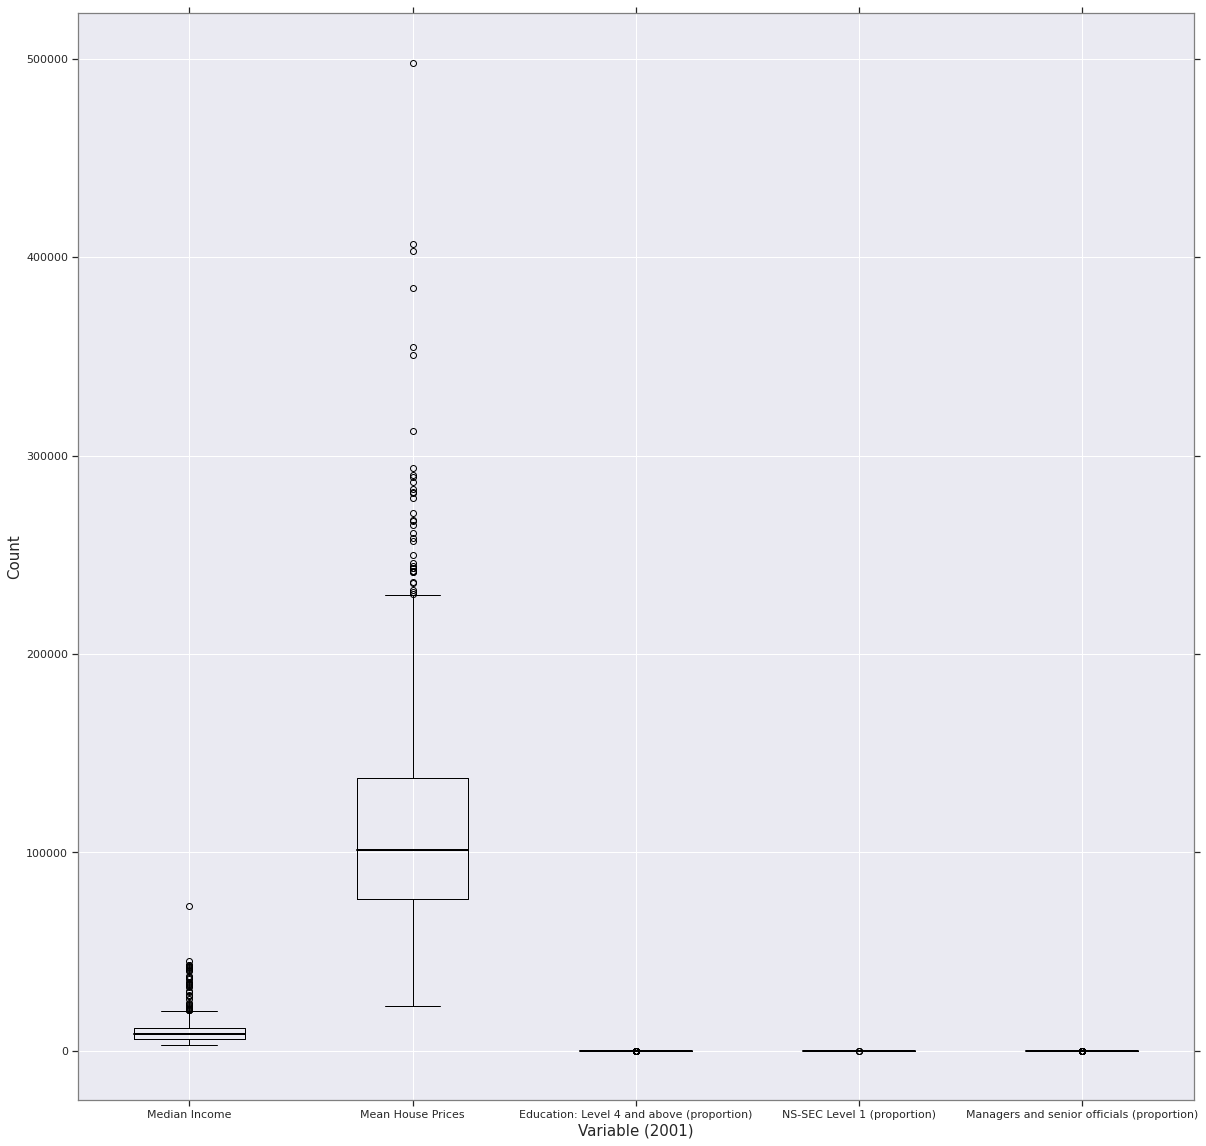

In [181]:
labels = ["Median Income", "Mean House Prices", "Education: Level 4 and above (proportion)", "NS-SEC Level 1 (proportion)", "Managers and senior officials (proportion)"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2001, labels=labels, boxprops= dict(linewidth=1.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Count", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2001)", fontsize=15)
plt.xticks(rotation=0)
plt.grid(True)

plt.savefig(os.path.join("Figures", 'box_2001_vars_asc.png'), transparent=False, dpi=300)

plt.show()

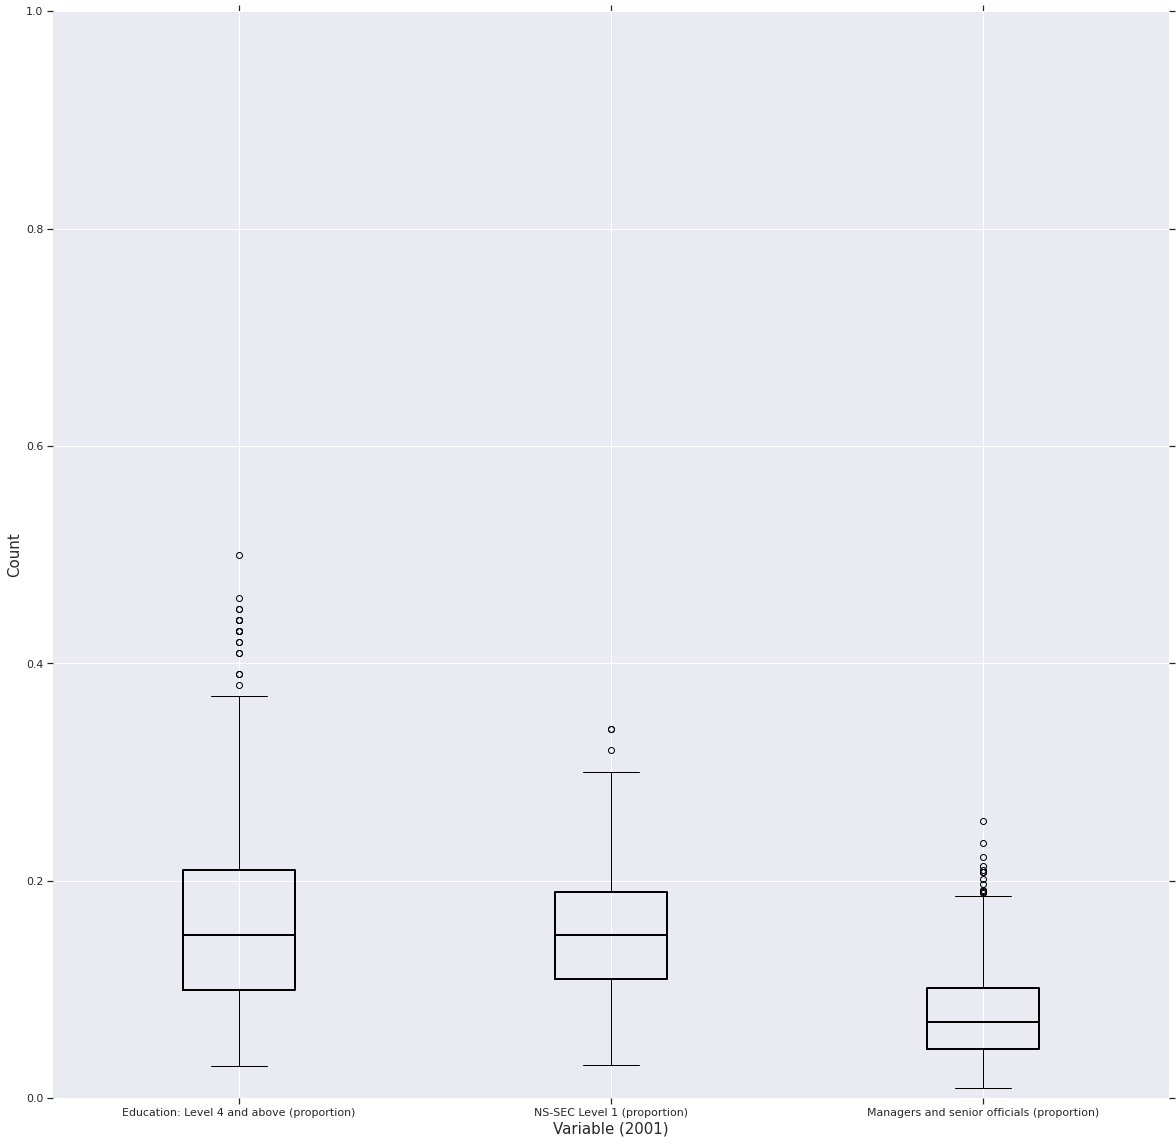

In [182]:
vars_2001_pro = vars_2001[vars_2001.columns[2:]]
labels = ["Education: Level 4 and above (proportion)", "NS-SEC Level 1 (proportion)", "Managers and senior officials (proportion)"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2001_pro, labels=labels, boxprops= dict(linewidth=2.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Count", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2001)", fontsize=15)
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.grid(True)

plt.savefig(os.path.join("Figures", 'box_2001_vars_prop_asc.png'), transparent=False, dpi=300)

plt.show()

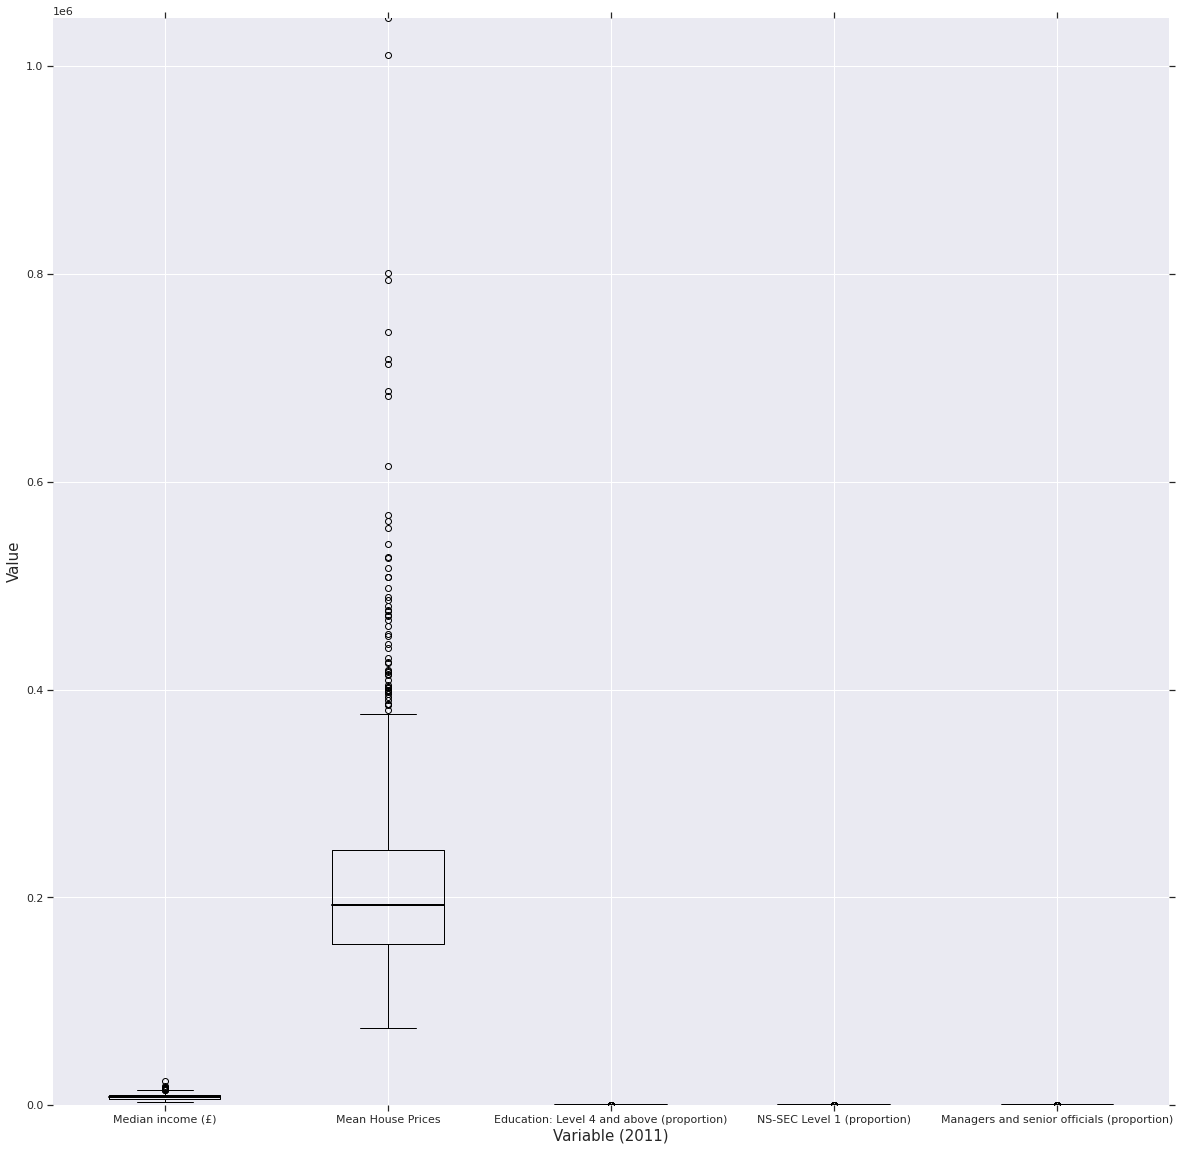

In [183]:
labels = ["Median income (£)", "Mean House Prices", "Education: Level 4 and above (proportion)", "NS-SEC Level 1 (proportion)", "Managers and senior officials (proportion)"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2011, labels=labels, boxprops= dict(linewidth=1.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2011)", fontsize=15)
plt.xticks(rotation=0)
plt.grid(True)
plt.ylim(0,vars_2011["Mean_house_prices_2011"].max())

plt.savefig(os.path.join("Figures", 'box_2011_vars_asc.png'), transparent=False, dpi=300)


plt.show()

#FIX!

In [184]:
vars_2011_pro = vars_2011[vars_2011.columns[2:]]
vars_2011_pro

,Edu_2011_prop,NSSEC_level_1_2011_prop,Cat_2011_prop
0,0.134520,0.062845,0.080617
1,0.118714,0.036607,0.059970
2,0.103883,0.032839,0.052189
3,0.092332,0.025997,0.060519
4,0.086128,0.027217,0.048641
...,...,...,...
897,0.171456,0.043317,0.079007
898,0.195669,0.052239,0.107884
899,0.268178,0.124598,0.143013
900,0.255023,0.105004,0.128959


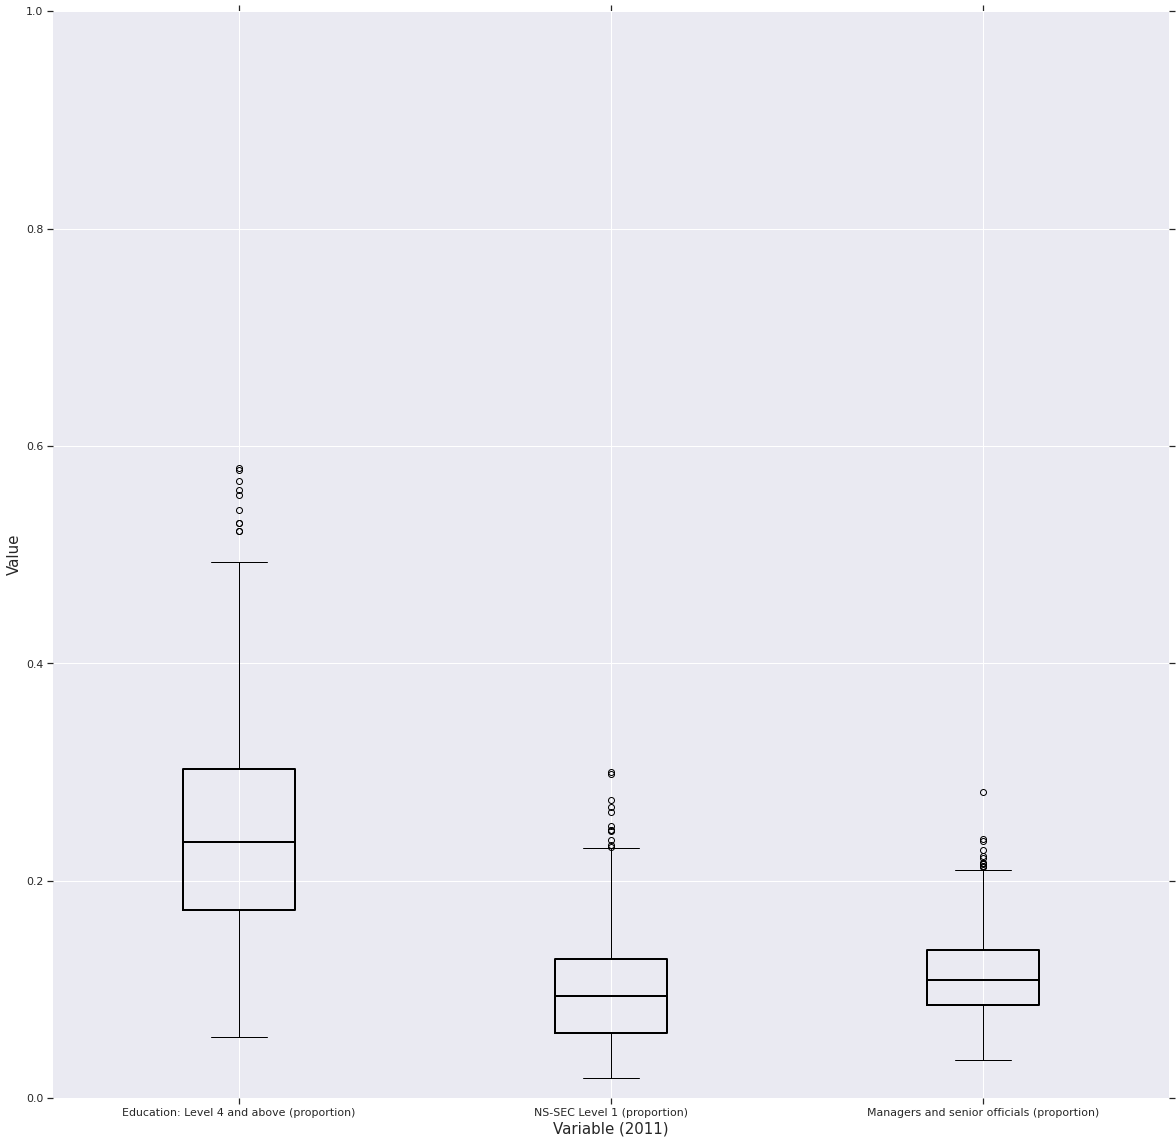

In [185]:
vars_2011_pro = vars_2011[vars_2011.columns[2:]]
labels = ["Education: Level 4 and above (proportion)", "NS-SEC Level 1 (proportion)", "Managers and senior officials (proportion)"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2011_pro, labels=labels, boxprops= dict(linewidth=2.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2011)", fontsize=15)
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.grid(True)
plt.savefig(os.path.join("Figures", 'box_2011_vars_prop_asc.png'), transparent=False, dpi=300)

plt.show()

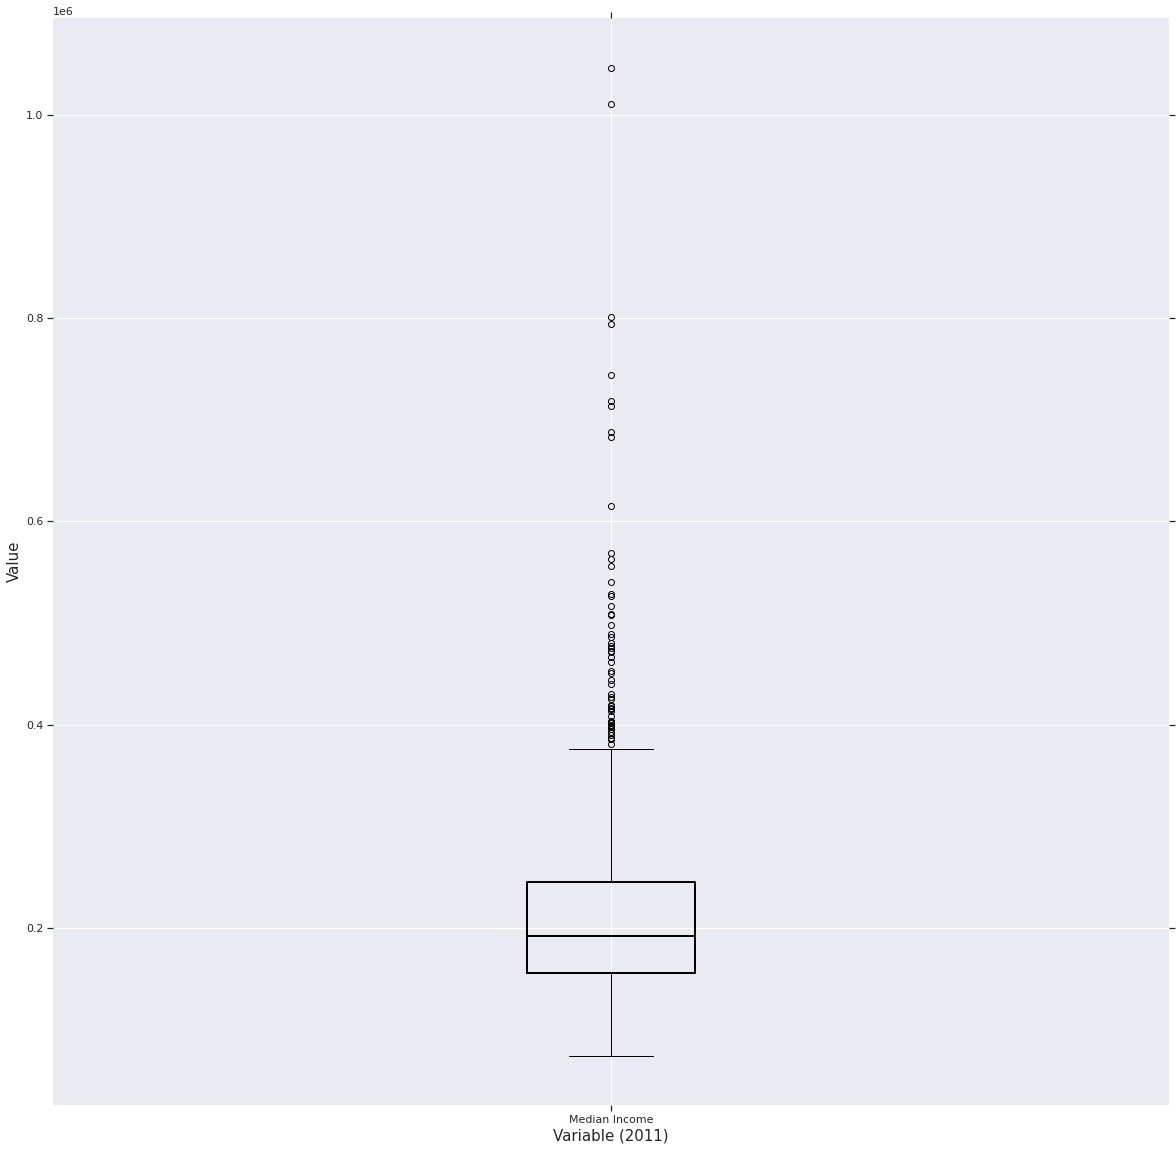

In [186]:
vars_2011_income = vars_2011[vars_2011.columns[1]]
labels = ["Median Income"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2011_income, labels=labels, boxprops= dict(linewidth=2.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2011)", fontsize=15)
plt.xticks(rotation=0)
plt.savefig(os.path.join("Figures", 'box_2011_vars_income_asc.png'), transparent=False, dpi=300)

plt.grid(True)
#plt.ticklabel_format(style='plain')

plt.show()

No handles with labels found to put in legend.


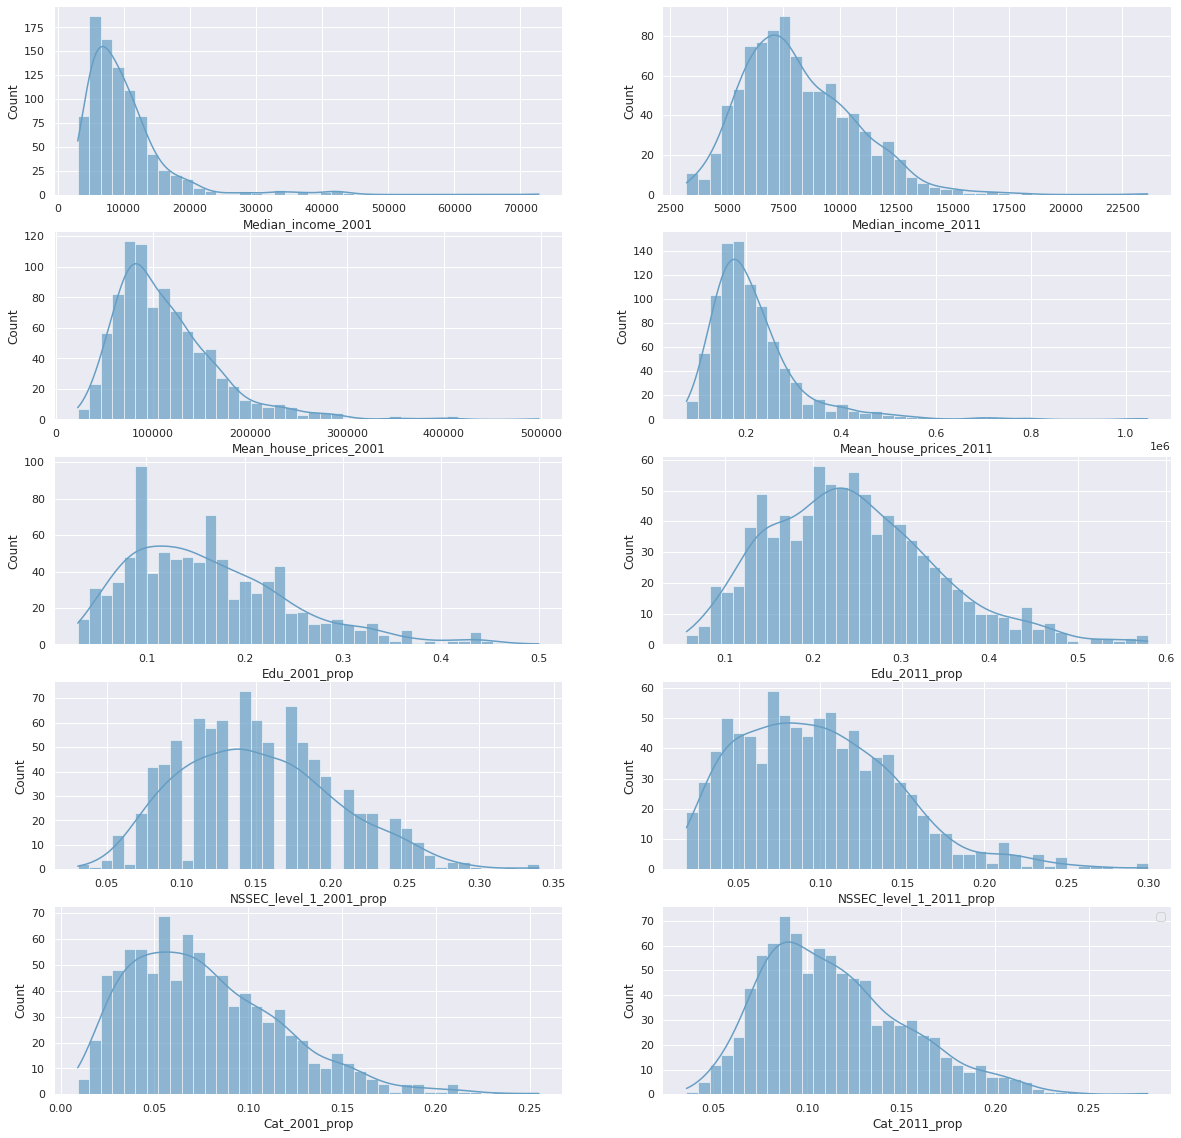

In [187]:
# Lets try and do histogram instead

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
sns.set()
sns.set_style("white")
sns.set(font_scale = 1)


sns.histplot(ax=axs[0,0],data=vars_2001, x="Median_income_2001", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[0,1],data=vars_2011, x="Median_income_2011", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[1,0],data=vars_2001, x="Mean_house_prices_2001", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[1,1],data=vars_2011, x="Mean_house_prices_2011", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[2, 0],data=vars_2001, x="Edu_2001_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[2,1],data=vars_2011, x="Edu_2011_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[3,0],data=vars_2001, x="NSSEC_level_1_2001_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[3,1],data=vars_2011, x="NSSEC_level_1_2011_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[4,0],data=vars_2001, x="Cat_2001_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[4,1],data=vars_2011, x="Cat_2011_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
 
plt.savefig(os.path.join("Figures", 'hist_unscaled_vars_asc.png'), transparent=False, dpi=300)

plt.legend() 
plt.show()

# 2. Scaling

In [188]:
# Import 

scale = variables.set_index('LSOA11CD')

In [189]:
values_2001 = vars_2001.values
values_2011 = vars_2011.values
stacked_df = np.concatenate((values_2001, values_2011), axis=0)

In [190]:
print("There are " + str(np.isnan(stacked_df).sum()) + " Nan values")


There are 0 Nan values


In [191]:
Robust_transformer = RobustScaler().fit(stacked_df)
Robust_transformer_df = Robust_transformer.transform(stacked_df)
Robust_transformer_df

array([[ 0.39777884, -0.73788722, -0.77118757, -0.50454025, -0.93364822],
       [ 1.05668556, -0.81698955, -1.0001204 , -0.37840517, -1.07135697],
       [-0.55079548, -0.78213772, -1.07643134, -0.63067532, -1.10621995],
       ...,
       [ 0.10635499,  0.49089383,  0.58850758,  0.05799784,  0.90385901],
       [-0.03250151,  0.78311595,  0.48811992, -0.18915083,  0.65887994],
       [-0.7154953 , -0.06413638,  0.52942237, -0.73161234,  0.89599537]])

In [192]:
Standard_transformer = StandardScaler().fit(stacked_df)
Standard_transformer_df = Standard_transformer.transform(stacked_df)
Standard_transformer_df

array([[ 0.13251065, -0.96341401, -1.16709121, -0.78836454, -1.33127156],
       [ 0.70502314, -1.04883379, -1.4744125 , -0.61279109, -1.51251219],
       [-0.69168894, -1.01119855, -1.57685292, -0.96393799, -1.55839589],
       ...,
       [-0.12070242,  0.36350276,  0.65817458, -0.00534083,  1.08710013],
       [-0.2413524 ,  0.67906298,  0.52341337, -0.3493589 ,  0.76467938],
       [-0.83479373, -0.23585454,  0.5788581 , -1.10443707,  1.07675067]])

In [193]:
scaled_df_2001 = pd.DataFrame(Robust_transformer_df[0:len(vars_2001),], index=vars_2001.index, columns=list(vars_2001.columns))
scaled_df_2011 = pd.DataFrame(Robust_transformer_df[len(vars_2011):,], index=vars_2011.index, columns=list(vars_2011.columns))

No handles with labels found to put in legend.


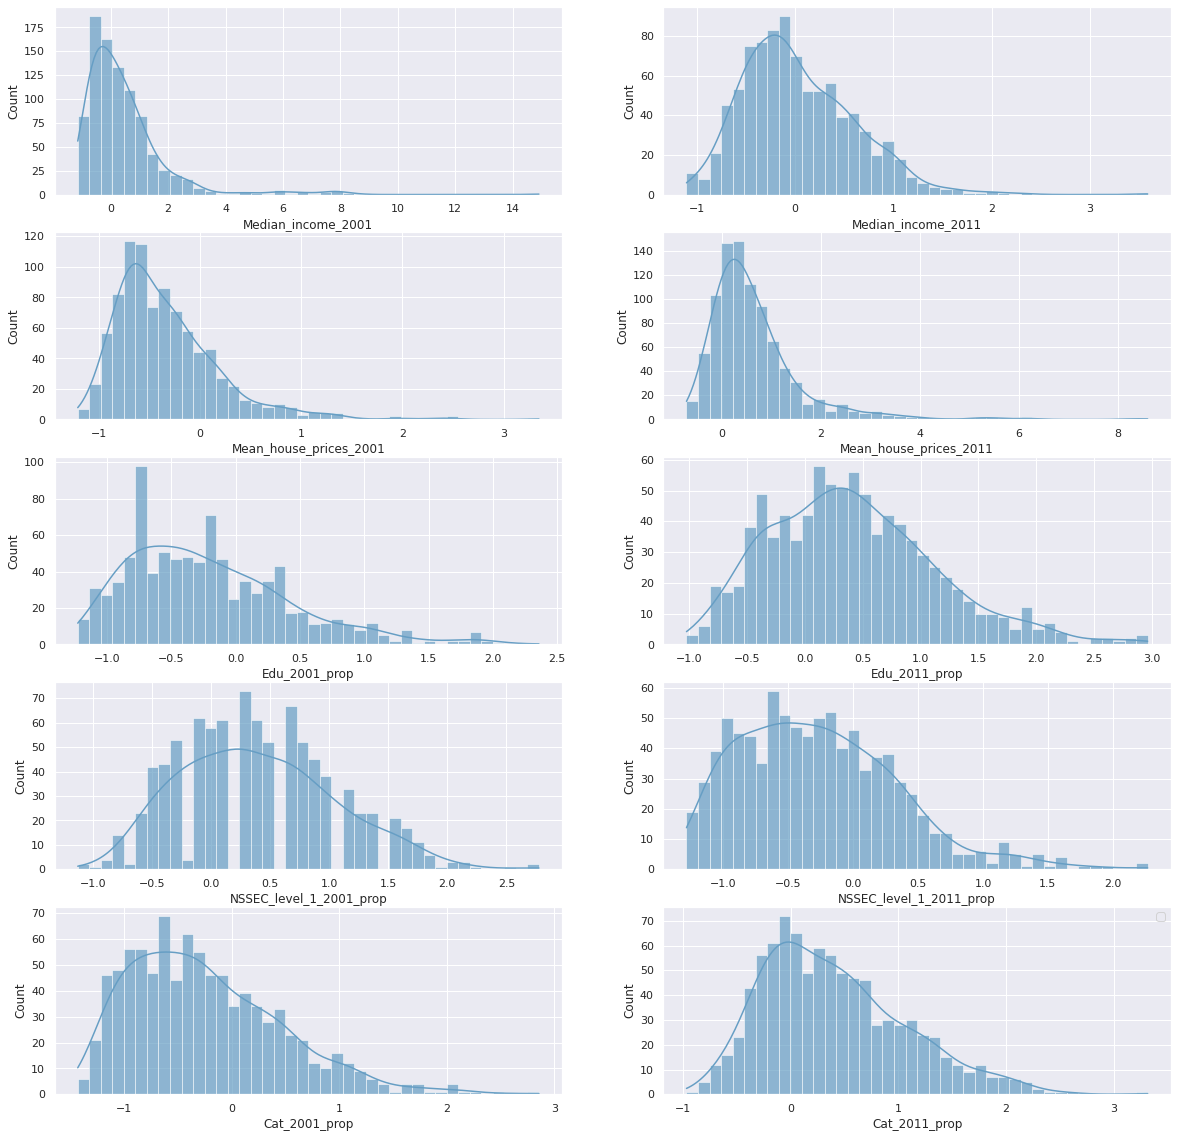

In [194]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,20))

sns.set(style="whitegrid")
sns.set(font_scale = 1)

sns.histplot(ax=axs[0,0],data=scaled_df_2001, x="Median_income_2001", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[0,1],data=scaled_df_2011, x="Median_income_2011", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[1,0],data=scaled_df_2001, x="Mean_house_prices_2001", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[1,1],data=scaled_df_2011, x="Mean_house_prices_2011", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[2, 0],data=scaled_df_2001, x="Edu_2001_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[2,1],data=scaled_df_2011, x="Edu_2011_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[3,0],data=scaled_df_2001, x="NSSEC_level_1_2001_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[3,1],data=scaled_df_2011, x="NSSEC_level_1_2011_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[4,0],data=scaled_df_2001, x="Cat_2001_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[4,1],data=scaled_df_2011, x="Cat_2011_prop", kde=True, legend = True, color="#669EC4", linewidth=0.5, alpha=0.7, bins=40)
   
plt.legend() 

plt.savefig(os.path.join("Figures", 'hist_robust_scaled_vars_asc.png'), transparent=False, dpi=300)

plt.show()


In [195]:
scaled_df_2001_stand = pd.DataFrame(Standard_transformer_df[len(vars_2001):,], index=vars_2001.index, columns=list(vars_2001.columns))
scaled_df_2001_stand = pd.DataFrame(Standard_transformer_df[len(vars_2011):,], index=vars_2011.index, columns=list(vars_2011.columns))

# 3. PCA

3.1 All variables

In [196]:
# carry out PCA to derive only the 1st principal component

pca = decomposition.PCA(n_components=1)             
pca.fit(Robust_transformer_df)                      
PCA_score = pd.DataFrame(pca.transform(Robust_transformer_df))  

print("Explained variance of the SES score when using robust is is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score when using robust is is: 0.54380


In [197]:

pca = decomposition.PCA(n_components=1)             
pca.fit(Standard_transformer_df)                      
PCA_score_stand = pd.DataFrame(pca.transform(Standard_transformer_df))  

print("Explained variance of the SES score when using Standard is is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score when using Standard is is: 0.60010


In [198]:
# what if one wanted to find all principal components?

pca_all = decomposition.PCA()             
pca_all.fit(Robust_transformer_df)                      
print(pca_all.explained_variance_ratio_)

[0.54379999 0.30260217 0.09116885 0.04122047 0.02120852]


In [199]:
pca_all_stan = decomposition.PCA()             
pca_all_stan.fit(Standard_transformer_df)                      
print(pca_all_stan.explained_variance_ratio_)

[0.60009762 0.21808228 0.10653701 0.04739917 0.02788392]


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

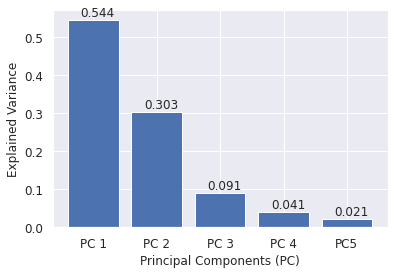

In [203]:
# visualise explained variance for each PC

plt.bar(['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC5'],pca_all.explained_variance_ratio_)

x = [1,2,3,4, 5]

for i in range(len(pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = pca_all.explained_variance_ratio_[i] + 0.01, s = pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel('Principal Components (PC)', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [204]:
pca_all.components_

array([[ 0.50096504,  0.50519654,  0.42217502,  0.32846319,  0.45573092],
       [ 0.81743701, -0.41964296, -0.27554375,  0.11237726, -0.25912065],
       [ 0.27645183,  0.42380133, -0.15061438, -0.84899136, -0.0222667 ],
       [-0.05593137,  0.5985995 , -0.61490609,  0.39806019, -0.31935702],
       [ 0.03573286,  0.1753491 ,  0.58740931,  0.01565386, -0.78910146]])

/tmp/ipykernel_1287/670179126.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


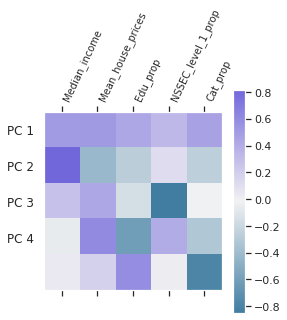

In [205]:
# visualise the constituents of each PC using heatmap

features = ['Median_income', 'Mean_house_prices', 'Edu_prop',
       'NSSEC_level_1_prop', 'Cat_prop']
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)

plt.matshow(pca_all.components_,cmap=cmap)
plt.yticks([0,1,2,3],['PC 1','PC 2','PC 3', 'PC 4'],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=10)
plt.grid(b=None, which = "major")

plt.tight_layout()
plt.savefig(os.path.join("Figures", 'heat_all_vars_explained_PCA_asc.png'))
plt.show()


In [206]:
PCA_2001 = pd.DataFrame(PCA_score.iloc[0:len(vars_2001),])
PCA_2011 = pd.DataFrame(PCA_score.iloc[len(vars_2011):,])

In [207]:
# renaming their column titles

PCA_2001 = PCA_2001.rename(columns={0: "Score_2001"})
PCA_2011 = PCA_2011.rename(columns={0: "Score_2011"})


In [208]:
# attaching the 2001 score to their respective LSOAs in the main dataframe (df_score)

df_score = scale.reset_index()
df_score["Score_2001"] = PCA_2001[:]

In [209]:
# PCA_2011 requires further resetting of the index propr to attaching them to the main dataframe

PCA_2011 = PCA_2011.reset_index()
PCA_2011 = PCA_2011.drop(columns="index")
df_score["Score_2011"] = PCA_2011

In [210]:
df_score["Rank_2001"] = df_score["Score_2001"].rank(ascending=False)
df_score["Rank_2011"] = df_score["Score_2011"].rank(ascending=False)

In [211]:
# quantifying the change in LSOA's ranks between the 2 years

df_score["Rank_chg"] = df_score["Rank_2001"] - df_score["Rank_2011"]

In [212]:
df_score["Rank_chg"].describe()


count    902.000000
mean       0.000000
std      119.563162
min     -486.000000
25%      -65.000000
50%        7.000000
75%       63.750000
max      586.000000
Name: Rank_chg, dtype: float64

In [213]:
# compute z-score of rank changes

from scipy.stats import zscore

df_score["Z_score"] = df_score[["Rank_chg"]].apply(zscore)

In [214]:
# as a supplementart approach - changes in LSOAs' score are computed

df_score["score_chg"]= df_score["Score_2011"] - df_score["Score_2001"]

In [215]:
# checking the top and bottom 5th percentile benchmarks for score changes

print(df_score["score_chg"].quantile(0.95))
print(df_score["score_chg"].quantile(0.15))

1.5632227746476104
0.1065038752581161


In [216]:
# Create spatial 

kent_2011 = gpd.read_file(os.path.join(shapefiles, "LSOA_KENT_2011.shp"))
df_score = pd.merge(df_score, kent_2011, on="LSOA11CD", how="right")
df_score = gpd.GeoDataFrame(df_score, geometry=(df_score["geometry"]))

In [217]:
# assign LSOA status based on: 
# (1) z-score of rank changes (z<-1 signify that n'hood is in decline (DEC), -1<z<1 signifies that n'hood is stable (STB), z>1 signifies that n'hood is in ascension (ASC))
# (2) changes in LSOAs' score are within the top or bottom 5th percentile (top 5th percentile: 'ASC' and bottom 5th percentile: 'DEC')

df_score["status"] = "STB"

for i in range(len(df_score)):
    if df_score["Z_score"][i] > 1 or df_score["score_chg"][i] > df_score["score_chg"].quantile(0.95):
        df_score["status"][i] = "ASC"
    elif df_score["Z_score"][i] < -1 or df_score["score_chg"][i] < df_score["score_chg"].quantile(0.05):
        df_score["status"][i] = "DEC"

/tmp/ipykernel_1287/2574660941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["status"][i] = "DEC"
/tmp/ipykernel_1287/2574660941.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["status"][i] = "ASC"


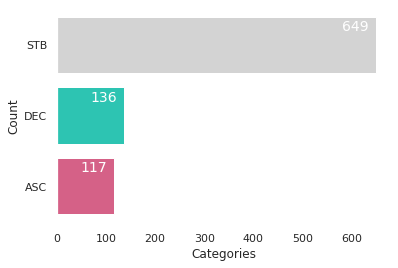

In [218]:
# Plot bar graph of counts

plt.rcParams['axes.facecolor'] = 'white'

# check dataframe

count = pd.DataFrame(df_score.groupby(df_score["status"]).size()).reset_index()
count = count.rename(columns={0:"count"})
count

fig, ax = plt.subplots()

index = ["Ascending", "Declining", "Stable"]
bar = plt.barh(count['status'], count['count'], color = [ "#d56187", "#2DC4B2", "lightgrey" ])

for i, v in enumerate(count["count"]):
    ax.text(v -68, i+.2, str(v), color='white', size=14)
    
plt.xlabel('Categories')
plt.ylabel('Count')

plt.savefig(os.path.join("Figures", 'bar_asc_dec_asc.png'), transparent=True, dpi=300)

plt.show()


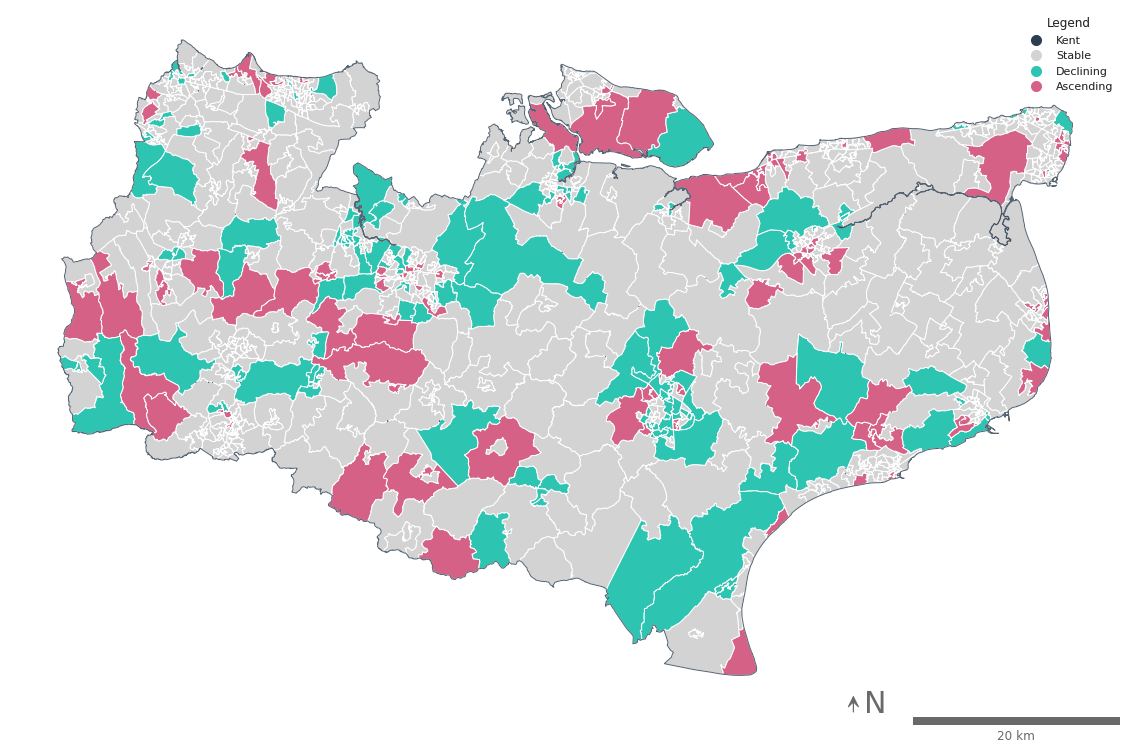

In [219]:
# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
stb = df_score.loc[df_score['status'] == "STB"]
dec = df_score.loc[df_score['status'] == "DEC"]
asc = df_score.loc[df_score['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_asc_all_vars.png'), transparent=True, dpi=300)

# Show map
plt.show()



# 3.2 Excluding Job Category variable

In [220]:
scale = variables.set_index('LSOA11CD')
vars_2001_cat = vars_2001[["Median_income_2001", 'Mean_house_prices_2001', 'Edu_2001_prop', 
       'NSSEC_level_1_2001_prop']]
vars_2011_cat = vars_2011[["Median_income_2011",'Mean_house_prices_2011', 'Edu_2011_prop', 
       'NSSEC_level_1_2011_prop']]

In [221]:
values_2001 = vars_2001_cat.values
values_2011 = vars_2011_cat.values
stacked_df = np.concatenate((values_2001, values_2011), axis=0)

In [222]:
Robust_transformer = RobustScaler().fit(stacked_df)
Robust_transformer_df = Robust_transformer.transform(stacked_df)
Robust_transformer_df

array([[ 0.39777884, -0.73788722, -0.77118757, -0.50454025],
       [ 1.05668556, -0.81698955, -1.0001204 , -0.37840517],
       [-0.55079548, -0.78213772, -1.07643134, -0.63067532],
       ...,
       [ 0.10635499,  0.49089383,  0.58850758,  0.05799784],
       [-0.03250151,  0.78311595,  0.48811992, -0.18915083],
       [-0.7154953 , -0.06413638,  0.52942237, -0.73161234]])

In [223]:
# carry out PCA to derive only the 1st principal component

pca = decomposition.PCA(n_components=1)             
pca.fit(Robust_transformer_df)                      
PCA_score = pd.DataFrame(pca.transform(Robust_transformer_df))  

print("Explained variance of the SES score when using robust is is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score when using robust is is: 0.52770


In [224]:
# what if one wanted to find all principal components?

pca_all = decomposition.PCA()             
pca_all.fit(Robust_transformer_df)                      
print(pca_all.explained_variance_ratio_)

[0.52769683 0.31984727 0.10729043 0.04516547]


In [225]:
pca_all.components_

array([[ 0.70974881,  0.45356788,  0.38670571,  0.37548835],
       [ 0.64464622, -0.62934713, -0.43384489, -0.01149157],
       [ 0.27732729,  0.40867993, -0.15811633, -0.85502603],
       [-0.06146099,  0.48081087, -0.79827096,  0.35750095]])

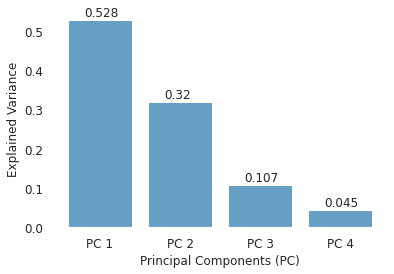

In [226]:
# visualise explained variance for each PC

plt.bar(['PC 1', 'PC 2', 'PC 3', 'PC 4'],pca_all.explained_variance_ratio_, color="#669EC4")

x = [1,2,3,4]

for i in range(len(pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = pca_all.explained_variance_ratio_[i] + 0.01, s = pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel('Principal Components (PC)', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(os.path.join("Figures", 'bar_four_cat_explained_PCA_asc.png'), dpi = 300, bbox_inches = "tight", transparent=True)


/tmp/ipykernel_1287/1899960262.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


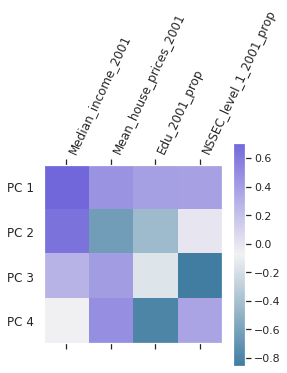

In [227]:
# visualise the constituents of each PC using heatmap

features = ["Median_income_2001", 'Mean_house_prices_2001', 'Edu_2001_prop', 
       'NSSEC_level_1_2001_prop']
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)

plt.matshow(pca_all.components_,cmap=cmap)
plt.yticks([0,1,2,3],['PC 1','PC 2','PC 3', 'PC 4'],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=12)
plt.grid(b=None, which = "major")

    
plt.savefig(os.path.join("Figures", 'heat_four_cat_explained_PCA_asc.png'), dpi = 300, bbox_inches = "tight")
plt.tight_layout()
plt.show()



In [228]:
PCA_2001 = pd.DataFrame(PCA_score.iloc[0:len(vars_2001_cat),])
PCA_2011 = pd.DataFrame(PCA_score.iloc[len(vars_2011_cat):,])

In [229]:
# renaming their column titles

PCA_2001 = PCA_2001.rename(columns={0: "Score_2001"})
PCA_2011 = PCA_2011.rename(columns={0: "Score_2011"})

In [230]:
# attaching the 2001 score to their respective LSOAs in the main dataframe (df_score)

df_score_2 = scale.reset_index()
df_score_2["Score_2001"] = PCA_2001[:]

In [231]:
# PCA_2011 requires further resetting of the index propr to attaching them to the main dataframe

PCA_2011 = PCA_2011.reset_index()
PCA_2011 = PCA_2011.drop(columns="index")
df_score_2["Score_2011"] = PCA_2011

In [232]:
df_score_2["Rank_2001"] = df_score_2["Score_2001"].rank(ascending=False)
df_score_2["Rank_2011"] = df_score_2["Score_2011"].rank(ascending=False)

In [233]:
# quantifying the change in LSOA's ranks between the 2 years

df_score_2["Rank_chg"] = df_score_2["Rank_2001"] - df_score_2["Rank_2011"]

In [234]:
df_score_2["Z_score"] = df_score_2[["Rank_chg"]].apply(zscore)


In [235]:
df_score_2["score_chg"]= df_score_2["Score_2011"] - df_score_2["Score_2001"]


In [236]:
df_score_2["status"] = "STB"

for i in range(len(df_score_2)):
    if df_score_2["Z_score"][i] > 1 or df_score_2["score_chg"][i] > df_score_2["score_chg"].quantile(0.95):
        df_score_2["status"][i] = "ASC"
    elif df_score_2["Z_score"][i] < -1 or df_score_2["score_chg"][i] < df_score_2["score_chg"].quantile(0.05):
        df_score_2["status"][i] = "DEC"

/tmp/ipykernel_1287/1023510583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score_2["status"][i] = "DEC"
/tmp/ipykernel_1287/1023510583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score_2["status"][i] = "ASC"


In [237]:
df_score_2.groupby(df_score_2["status"]).size()

status
ASC    131
DEC    150
STB    621
dtype: int64

In [238]:
# Create spatial 

kent_2011 = gpd.read_file(os.path.join(shapefiles, "LSOA_KENT_2011.shp"))
df_score_2 = pd.merge(df_score_2, kent_2011, on="LSOA11CD", how="right")
df_score_2 = gpd.GeoDataFrame(df_score_2, geometry=(df_score["geometry"]))

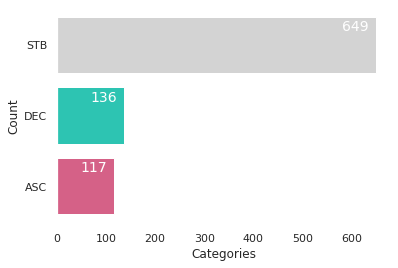

In [250]:
# Plot bar graph of counts

plt.rcParams['axes.facecolor'] = 'white'

# check dataframe

count = pd.DataFrame(df_score_2.groupby(df_score["status"]).size()).reset_index()
count = count.rename(columns={0:"count"})
count

fig, ax = plt.subplots()

index = ["Ascending", "Declining", "Stable"]
bar = plt.barh(count['status'], count['count'], color = [ "#d56187", "#2DC4B2", "lightgrey" ])

for i, v in enumerate(count["count"]):
    ax.text(v -68, i+.2, str(v), color='white', size=14)
    
plt.xlabel('Categories')
plt.ylabel('Count')

plt.savefig(os.path.join("Figures", 'bar_asc_four_vars.png'), transparent=True, dpi=300)

plt.show()

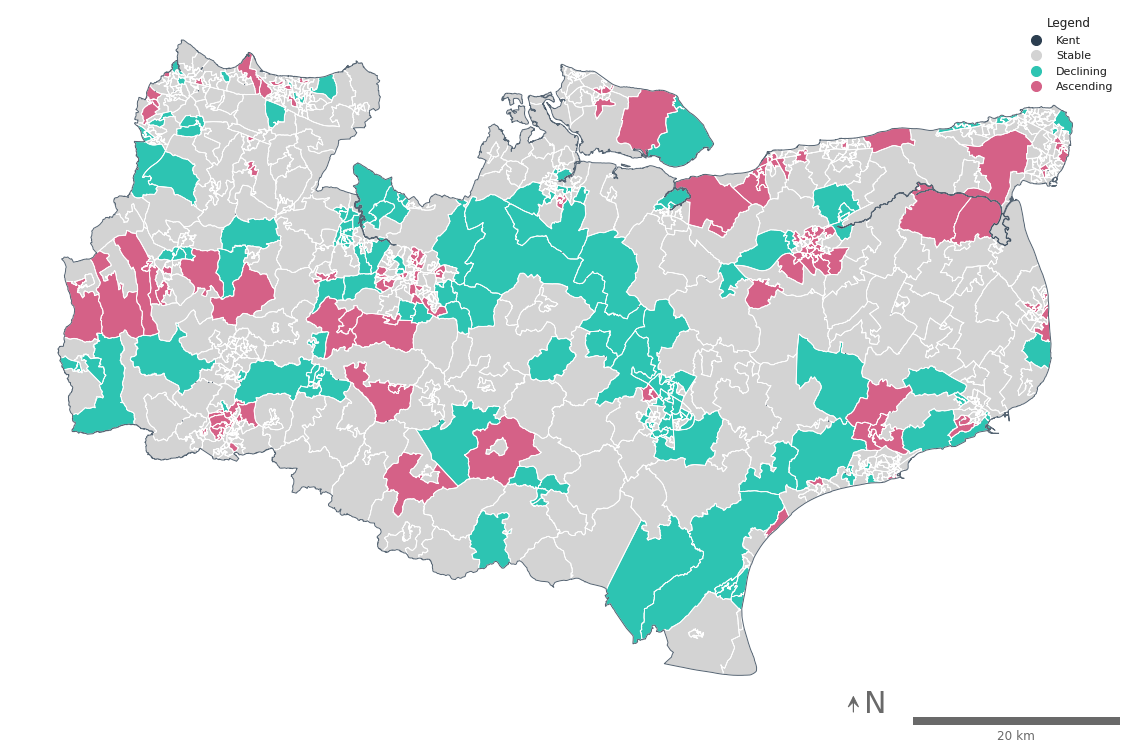

In [240]:
# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
stb = df_score_2.loc[df_score_2['status'] == "STB"]
dec = df_score_2.loc[df_score_2['status'] == "DEC"]
asc = df_score_2.loc[df_score_2['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.5)


# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_asc_four_vars.png'), transparent=True, dpi=300)

# Show map
plt.show()

In [241]:
# Look at value counts

df_score_2.groupby(df_score_2["status"]).size()

status
ASC    131
DEC    150
STB    621
dtype: int64

In [242]:
df_score.groupby(df_score["status"]).size()

status
ASC    117
DEC    136
STB    649
dtype: int64

In [243]:
df_score_2.columns

Index(['LSOA11CD', 'Unnamed: 0', 'Median_income_2001', 'Median_income_2011',
       'Mean_house_prices_2001', 'Mean_house_prices_2011', 'Edu_2001_prop',
       'Edu_2011_prop', 'NSSEC_level_1_2001_prop', 'NSSEC_level_1_2011_prop',
       'Cat_2001_prop', 'Cat_2011_prop', 'Score_2001', 'Score_2011',
       'Rank_2001', 'Rank_2011', 'Rank_chg', 'Z_score', 'score_chg', 'status',
       'LSOA11NM', 'geometry'],
      dtype='object')

In [244]:
# Filter and save

df_score_2_filt = df_score_2[["LSOA11CD", 'LSOA11NM', 'Score_2001', 'Score_2011',
       'Rank_2001', 'Rank_2011', 'Rank_chg', 'Z_score', 'score_chg', 'status',
       'geometry']]

df_score_2_filt = df_score_2_filt.rename(columns={"status":"Level1Cat"})

In [245]:
df_score_2_filt.to_csv(os.path.join(clean, "Level1.csv"))

ImportError: cannot import name 'FilePath' from 'pandas._typing' (/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_typing.py)

In [ ]:
df_score_2_filt.to_file(os.path.join(clean, "Level1.shp"))

# 4. Hotspot Analysis

In [ ]:
!pip install pysal

In [ ]:
! pip install splot

In [ ]:
from pysal.viz.splot.esda import lisa_cluster
from pysal.explore import esda 
import libpysal as lps
import pysal as ps


In [ ]:
W_queen = lps.weights.Queen.from_dataframe(df_score_2_filt)
W_queen.transform = 'r'

In [ ]:
#Calculate spatial lag

score_Lag = lps.weights.lag_spatial(W_queen, df_score_2_filt['score_chg'])

In [ ]:
score=df_score_2_filt['score_chg']
b,a = np.polyfit(score, score_Lag, 1)
f, ax = plt.subplots(1, figsize=(10, 8))
ax.grid(False)
plt.plot(score, score_Lag, '.', color='firebrick')

plt.vlines(score.mean(), score_Lag.min(), score_Lag.max(), linestyle='--')
plt.hlines(score_Lag.mean(), score.min(), score.max(), linestyle='--')

plt.plot(score, a + b*score, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of COVID-19 score Per Thousand')
plt.xlabel('Score Change, 2001 to 2011')
plt.show()

In [ ]:
#Moran's I value is close to 0, hence csr
W_queen = lps.weights.Queen.from_dataframe(df_score_2_filt)
mi = esda.moran.Moran(df_score_2_filt['score_chg'], W_queen)
mi.I

In [ ]:
#clusters

lisa = ps.explore.esda.Moran_Local(df_score_2_filt['score_chg'].values, W_queen, permutations=999)
lisa.q
lisa.p_sim
(lisa.p_sim < 0.05).sum()

In [ ]:
df_score_2_filt['lag_DPT'] = lps.weights.lag_spatial(W_queen, df_score_2_filt['score_chg'])
sigs = df_score_2_filt['score_chg'][lisa.p_sim <= .05]
W_sigs = df_score_2_filt['lag_DPT'][lisa.p_sim <= .05]
insigs = df_score_2_filt['score_chg'][lisa.p_sim > .05]
W_insigs = df_score_2_filt['lag_DPT'][lisa.p_sim > .05]

In [ ]:
# Visulise previous data on gentrification

# Plot shapfiles

# Set axes
fig, ax = lisa_cluster(lisa, df_score_2_filt, figsize=(15,15))
ax.set_aspect('equal')
ax.set_facecolor("white")
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.5)


# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)


# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
 

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_asc_lisa.png'), transparent=True, dpi=300)

# Show map
plt.show()

In [ ]:
#find data in HH and LL clusters

#hotspot 

sig = lisa.p_sim < 0.05
hotspot = sig * lisa.q==1
coldspot = sig * lisa.q==3
doughnut = sig * lisa.q==2
diamond = sig * lisa.q==4

In [ ]:
# Hot spots signifigant

sig_1 = lisa.p_sim < 0.01
sig_5 = lisa.p_sim < 0.05
sig_10 = lisa.p_sim < 0.1

hotspot_1 = sig_1 * lisa.q==1
hotspot_5 = sig_5 * lisa.q==1
hotspot_10 = sig_10 * lisa.q==1


In [ ]:
spots_1 = ['Not Signifigant', 'Hot Spot (99%)']
spots_5 = ['Not Signifigant', 'Hot Spot (95%)']
spots_10 = ['Not Signifigant', 'Hot Spot (90%)']

labels_1 = [spots[i] for i in hotspot_1*1]
labels_5 = [spots[i] for i in hotspot_5*1]
labels_10 = [spots[i] for i in hotspot_10*1]

fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="lightgrey", alpha=0.8, zorder=1, linewidth=0.5)


# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)


from matplotlib import colors
hmap = colors.ListedColormap(['#C52104', 'None'])
#f, ax = plt.subplots(1, figsize=(9, 9))
df_score_2_filt.assign(cl=labels_1).plot(column='cl', categorical=True,  k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=False, zorder=10)
hmap_5 = colors.ListedColormap(['#F2B807', 'None'])
df_score_2_filt.assign(cl=labels_5).plot(column='cl', categorical=True,  k=2, cmap=hmap_5, linewidth=0.1, ax=ax, edgecolor='white', legend=False, zorder=5)
hmap_10 = colors.ListedColormap(['#F2E750', 'None'])
df_score_2_filt.assign(cl=labels_10).plot(column='cl', categorical=True,  k=2, cmap=hmap_10, linewidth=0.1, ax=ax, edgecolor='white', legend=False)


# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l2 = plt.scatter([],[], s=100, marker='o', color='#F2E750')
l3 = plt.scatter([],[], s=100, marker='o', color='#F2B807')
l4 = plt.scatter([],[], s=100, marker='o', color='#C52104')

labels = ["Not Signifigant", "Hot Spot (90% Confidence)","Hot Spot (95% Confidence)", "Hot Spot (99% Confidence)"]
legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

plt.savefig(os.path.join("Figures", 'map_asc_hotspot.png'), transparent=True, dpi=300)


ax.set_axis_off()
plt.show()

In [ ]:
# Cold spot

spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df_score_2_filt.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
# HL
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]
 
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df_score_2_filt.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
# LH

spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

from matplotlib import colors
hmap = colors.ListedColormap(['orange', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df_score_2_filt.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
gdf = df_score_2_filt

# 5. Merge with Census Data

In [ ]:
census_2011 = pd.read_csv(os.path.join("LSOA Profiles", "census_2011_profile.csv"))

In [ ]:
explore = pd.merge(df_score_2_filt, census_2011, on="LSOA11CD")